# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [28]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math

from mpl_toolkits.mplot3d import Axes3D
#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))



#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [54]:
# generate vectors
u1 = np.array([[4], [9], [6]])
u2 = np.array([[6], [8], [8]])
u3 = np.array([[0], [9], [6]])
list_u = [u1, u2, u3]
matrix_of_vectors = np.column_stack([u1,u2,u3])
print(f"[u1 u2 u3 ] \n{matrix_of_vectors}")
print(f"rank of matrix is {np.linalg.matrix_rank(matrix_of_vectors)}")

[u1 u2 u3 ] 
[[4 6 0]
 [9 8 9]
 [6 8 6]]
rank of matrix is 3


# they are linearly independent

#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

In [55]:
# function for drawing
def draw_3d(list_u):
    %matplotlib notebook
    color = ['r', 'g', 'b']
    cnt = 0
    plt.figure()
    ax = plt.axes(projection='3d')
    r = np.arange(0,1,0.05)
    for u in list_u:
        ax.plot3D(r*u[0], r*u[1], r*u[2],color[cnt%3])
        cnt+=1

<IPython.core.display.Javascript object>


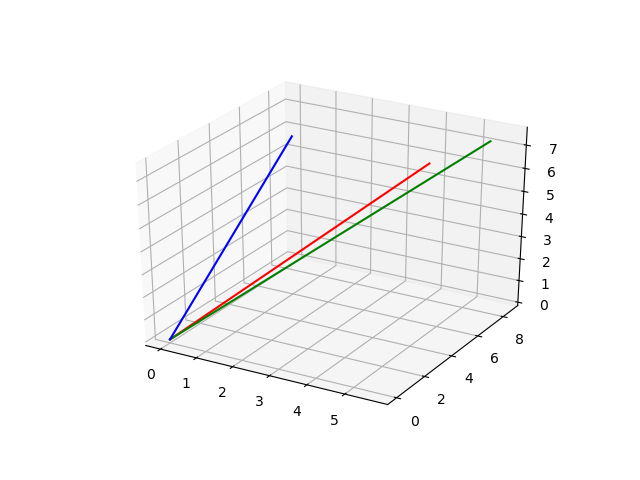

In [56]:
draw_3d(list_u)

In [ ]:
# from the figur above we notice that the three vector is not orthogonal

### ---------------------------------------------------Write your answer here--------------------------------------------


    Determine visually whether the vectors are mutually orthogonal or not
    
    the vectors is not orthogonal




### --------------------------------------------------------------------------------------------------------------------------------

#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

In [57]:
# get three orthogonal vectors 
# 1- make u1 base vector 
v1 = u1 
# 2- make v2
v2 = u2 - ((v1.T@u2)/(v1.T@v1))*v1

In [58]:
# see v2
v2

array([[ 1.66917293],
       [-1.7443609 ],
       [ 1.5037594 ]])

In [59]:
# check if they are orthognal
v1.T@v2 == 0

array([[ True]])

<IPython.core.display.Javascript object>


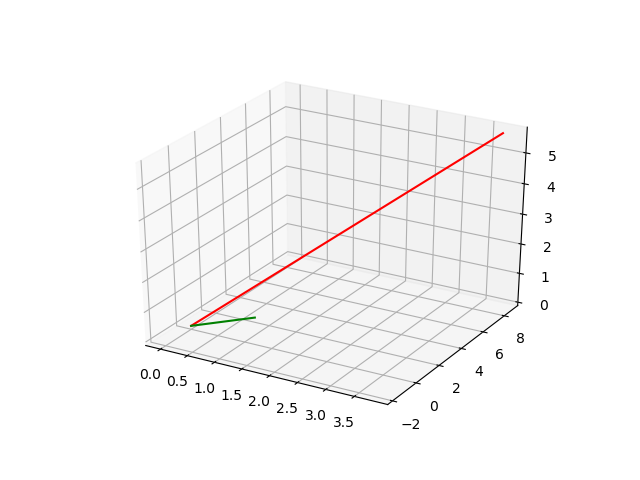

In [60]:
# draw v1, v2
draw_3d([v1,v2])

#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [61]:
# 2- make v3
v3 = u3 - ((v1.T@u3)/(v1.T@v1))*v1 - ((v2.T@u3)/(v2.T@v2))*v2

In [62]:
# see v2
v3

array([[-2.14126394],
       [-0.35687732],
       [ 1.96282528]])

In [65]:
# check if they are orthognal
print(np.round(v1.T@v3,12) == 0)
print(np.round(v2.T@v3,12) == 0)

[[ True]]
[[ True]]


<IPython.core.display.Javascript object>


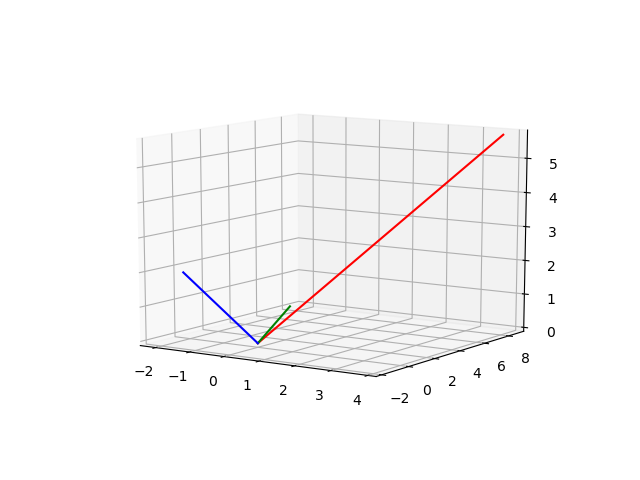

In [66]:
# draw v1, v2, v3
draw_3d([v1,v2,v3])

#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [67]:
# make it orthonarmal 
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)

<IPython.core.display.Javascript object>


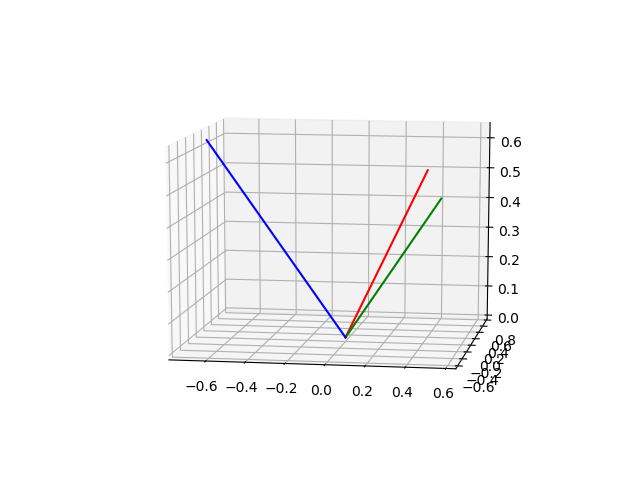

In [68]:
# draw them 
draw_3d([w1,w2,w3])

In [69]:
# print them 
print(f"w1 is \n{w1}")
print(f"w2 is \n{w2}")
print(f"w3 is \n{w3}")

w1 is 
[[0.34684399]
 [0.78039897]
 [0.52026598]]
w2 is 
[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
w3 is 
[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]


In [70]:
#Define the matrix Q = [w1, w2, w3] 
Q = np.column_stack([w1, w2, w3])
#What is the inverse matrix Q Now.
# we can get inverse by two ways 
# 1- traditional way 
print(f"Q is \n{Q}")
print(f"traditional invers way \n{np.linalg.inv(Q)}")
print(f"using property of orthonormal basis Q.T \n{Q.T}")

Q is 
[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
traditional invers way 
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]
using property of orthonormal basis Q.T 
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]


# from above Q.T = Q-1

# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [76]:
#Generate a random 3 * 3 integer matrix
A = rmat(3,3)
print(f"A is\n{A}")
# get all eigen values and vectors
eigen_values, eigen_vectors = np.linalg.eig(A)
print(f"eigen_values is\n{eigen_values}")
print(f"eigen_vectors is\n{eigen_vectors}")

A is
[[9. 4. 4.]
 [0. 0. 1.]
 [5. 8. 3.]]
eigen_values is
[11.7059454   2.25979898 -1.96574438]
eigen_vectors is
[[-0.84780215 -0.61642294 -0.15772842]
 [-0.04513844  0.31864039 -0.44774   ]
 [-0.52838814  0.72006323  0.88014239]]


In [78]:
# test whether its eigenvalues are all real
z = eigen_values - eigen_values.real
print(f"eigen is real if z is zeros and z = {z}")

eigen is real if z is zeros and z = [0. 0. 0.]


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


In [79]:
#characteristic polynomial p(t) of your matrix A 
from sympy.abc import t
# create identity matrix
I = np.eye(3)
# to get lamda values ---> we use Av - lamdav = 0 ----->(A-lamda(t)*I)
p = sym.det(sym.Matrix(A - t * I))
# the equation for getting lamda values
p

-1.0*t*(3.0 - 1.0*t)*(9.0 - 1.0*t) + 28.0*t - 52.0

In [81]:
# solve the equation for lamda values
roots = sym.solve(p)
print(f"lamdas are {roots}")

lamdas are [-1.96574437519032 + 0.e-22*I, 2.25979897861207 + 0.e-20*I, 11.7059453965782 - 0.e-20*I]


<IPython.core.display.Javascript object>


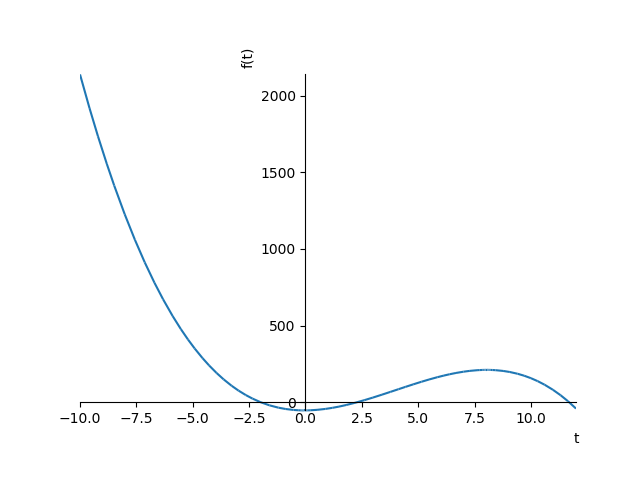

In [88]:
# Plot the characteristic polynomial of A in a graphics window
p1 = sym.plot(p, (t, -10, 12), show=False)
p1.show()

# Use the graph to obtain approximate values for the three real roots of p(t)??
 my answer : p ---> equation to get t, when we solve this equation with zero axis we get from the figure below that lamdas are -1.9, 2.3,11

#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

In [93]:
# Use the python to generate a matrix P and a diagonal matrix D
eigen_values, eigen_vectors = np.linalg.eig(A)
D = np.diag(eigen_values)
print(f"this diagonal matrix using eigen values of A express diagonal form of A \n{D}\n")
print(f"this p matrix using eigen vector of A \n{eigen_vectors}")

this diagonal matrix using eigen values of A express diagonal form of A 
[[11.7059454   0.          0.        ]
 [ 0.          2.25979898  0.        ]
 [ 0.          0.         -1.96574438]]

this p matrix using eigen vector of A 
[[-0.84780215 -0.61642294 -0.15772842]
 [-0.04513844  0.31864039 -0.44774   ]
 [-0.52838814  0.72006323  0.88014239]]


In [97]:
# get all eigen vectors column seperated 
p1 = eigen_vectors[:, [0]] # all rows and first column in column form 
p2 = eigen_vectors[:, [1]]
p3 = eigen_vectors[:, [2]]
###########################################
# this equal to A@eigen_vector_1 - lamda1*eigen_vector_1 = 0 from the defination
print(f"from defination A @ p1 - D[0, 0] * p1 = \n{np.round(A @ p1 - D[0, 0] * p1,12)}") 
print(f"from defination A @ p2 - D[1, 1] * p2 = \n{np.round(A @ p2 - D[1, 1] * p2,12)}")
print(f"from defination A @ p3 - D[2, 2] * p3 = \n{np.round(A @ p3 - D[2, 2] * p3,12)}")

from defination A @ p1 - D[0, 0] * p1 = 
[[ 0.]
 [-0.]
 [ 0.]]
from defination A @ p2 - D[1, 1] * p2 = 
[[-0.]
 [ 0.]
 [ 0.]]
from defination A @ p3 - D[2, 2] * p3 = 
[[ 0.]
 [-0.]
 [-0.]]


### ---------------------------------------------------Write your answer here------------------------------------


#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 
that eigen vectors are still in the same direction after we applay transform A, they only scaled by value so when we mins A@eigen_vector from constant value which is lamda we get zero vector 
they are equal 

### ------------------------------------------------------------------------------------------------------------------------

#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

In [101]:
#Verify by python that A = P @ D @ P-1
print (f"A is \n{A}")
print(f"P @ D @ P^-1 = \n{np.round(eigen_vectors @ D @ np.linalg.inv(eigen_vectors),12)}")

A is 
[[9. 4. 4.]
 [0. 0. 1.]
 [5. 8. 3.]]
P @ D @ P^-1 = 
[[ 9.  4.  4.]
 [-0. -0.  1.]
 [ 5.  8.  3.]]


In [103]:
# function to calculate power using diagonal matrix 
def power_diagonal(D,P,power):
    power_D = D**power
    return P@power_D@np.linalg.inv(P)

In [106]:
# try our power and power in numpy
print("power 5")
print(f"function from numpy \n{np.linalg.matrix_power(A, 5)}\n")
print(f"function using diagonal properites \n{power_diagonal(D,eigen_vectors,5)}\n")
print("power 10")
print(f"function from numpy \n{np.linalg.matrix_power(A, 10)}\n")
print(f"function using diagonal properites \n{power_diagonal(D,eigen_vectors,10)}\n")


power 5
function from numpy 
[[159849. 113684.  86484.]
 [  8500.   6060.   4621.]
 [ 99605.  70968.  53923.]]

function using diagonal properites 
[[159849. 113684.  86484.]
 [  8500.   6060.   4621.]
 [ 99605.  70968.  53923.]]

power 10
function from numpy 
[[3.51322556e+10 2.49987953e+10 1.90131914e+10]
 [1.87050120e+09 1.33098073e+09 1.01229544e+09]
 [2.18959881e+10 1.55803684e+10 1.18498719e+10]]

function using diagonal properites 
[[3.51322556e+10 2.49987953e+10 1.90131914e+10]
 [1.87050121e+09 1.33098073e+09 1.01229544e+09]
 [2.18959881e+10 1.55803684e+10 1.18498719e+10]]



### ---------------------------------------------------Write your answer here------------------------------------


from above we notice that we can power the matrix, using diagonal form by only power the matrix and dot it with eigen vectors matrix and its inverse one time only ======> that save time and computional 




### ------------------------------------------------------------------------------------------------------------------------